### Initial run

Initial end to end test, a sort of a "teaser" to highlight the motivation for `concurrent_dataloader`. 

In [16]:
from benchmarking.analysis.analyze_results import *

In [17]:
output_base_folder = Path("/iarai/home/ivan.svogor/storage-benchmarking-raw/referenced-experiments/initial_run")

In [18]:
s3_folder_filter="1011_4/*benchmark_e2e*"
scratch_folder_filter="1111_5/*benchmark_e2e*"

Load the data

In [19]:
df_dataloader_s3 = extract_timelines(output_base_folder, folder_filter=s3_folder_filter)
df_dataloader_scratch = extract_timelines(output_base_folder, folder_filter=scratch_folder_filter)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 426/426 [00:01<00:00, 269.27it/s]


Create "colors" and "lanes". Colors are used to distinguish different function types, e.g. function that loads a batch, calls the `next_data`, `run_traning_batch` from Lightning and `training_batch_to_device` also from lightning.
Lanes, every single call of the aforementioned funcitons in their own respective lane, so we get a nice overview of when the function is called, and how long it tookl

In [5]:
unique_functions_s3 = np.unique(df_dataloader_s3["item_x"])
print(f"Unique functions: {unique_functions_s3}")

colors = {}
for i, color in zip(unique_functions_s3, ["red", "gold", "blue", "magenta", "aqua"]):
    colors[str(i)] = color
lanes={}
for i, lane in zip(unique_functions_s3, range(len(unique_functions_s3))):
    lanes[str(i)] = lane
    
print(f"Lanes: {lanes}")

unique_runs_s3 = np.unique(df_dataloader_s3["run"])
unique_runs_scratch = np.unique(df_dataloader_scratch["run"])

Unique functions: ['batch' 'next_data' 'run_training_batch' 'training_batch_to_device']
Lanes: {'batch': 0, 'next_data': 1, 'run_training_batch': 2, 'training_batch_to_device': 3}


Extract the GPU Utilization data

In [6]:
df_gpuutil_s3 = extract_gpuutil(output_base_folder, folder_filter=s3_folder_filter)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 425/425 [00:01<00:00, 307.01it/s]


In [7]:
df_gpuutil_scratch = extract_gpuutil(output_base_folder, folder_filter=scratch_folder_filter)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 426/426 [00:00<00:00, 4601.03it/s]


Get unique runs to loop through, and plot the results

In [8]:
unique_runs_s3 = np.unique(df_dataloader_s3["run"])

In [9]:
unique_runs_scratch = np.unique(df_dataloader_scratch["run"])

In [10]:
print(unique_runs_s3, unique_runs_scratch)

['20211110f232825_benchmark_e2e_torch_s3_256_4_16_1_threaded_sync'
 '20211110f234524_benchmark_e2e_lightning_s3_256_4_16_1_threaded_sync'
 '20211111f000909_benchmark_e2e_torch_s3_256_4_16_1_asyncio_sync'
 '20211111f002644_benchmark_e2e_lightning_s3_256_4_16_1_asyncio_sync'
 '20211111f005129_benchmark_e2e_torch_s3_256_4_16_1_vanilla_sync'
 '20211111f031032_benchmark_e2e_lightning_s3_256_4_16_1_vanilla_sync'] ['20211111f205911_benchmark_e2e_torch_scratch_256_4_16_1_threaded_sync'
 '20211111f210705_benchmark_e2e_lightning_scratch_256_4_16_1_threaded_sync'
 '20211111f212315_benchmark_e2e_torch_scratch_256_4_16_1_asyncio_sync'
 '20211111f213057_benchmark_e2e_lightning_scratch_256_4_16_1_asyncio_sync'
 '20211111f214714_benchmark_e2e_torch_scratch_256_4_16_1_vanilla_sync'
 '20211111f215633_benchmark_e2e_lightning_scratch_256_4_16_1_vanilla_sync']


### Plot function timelines for remote storage (AWS S3)

64.74193548387096 39.53448275862069


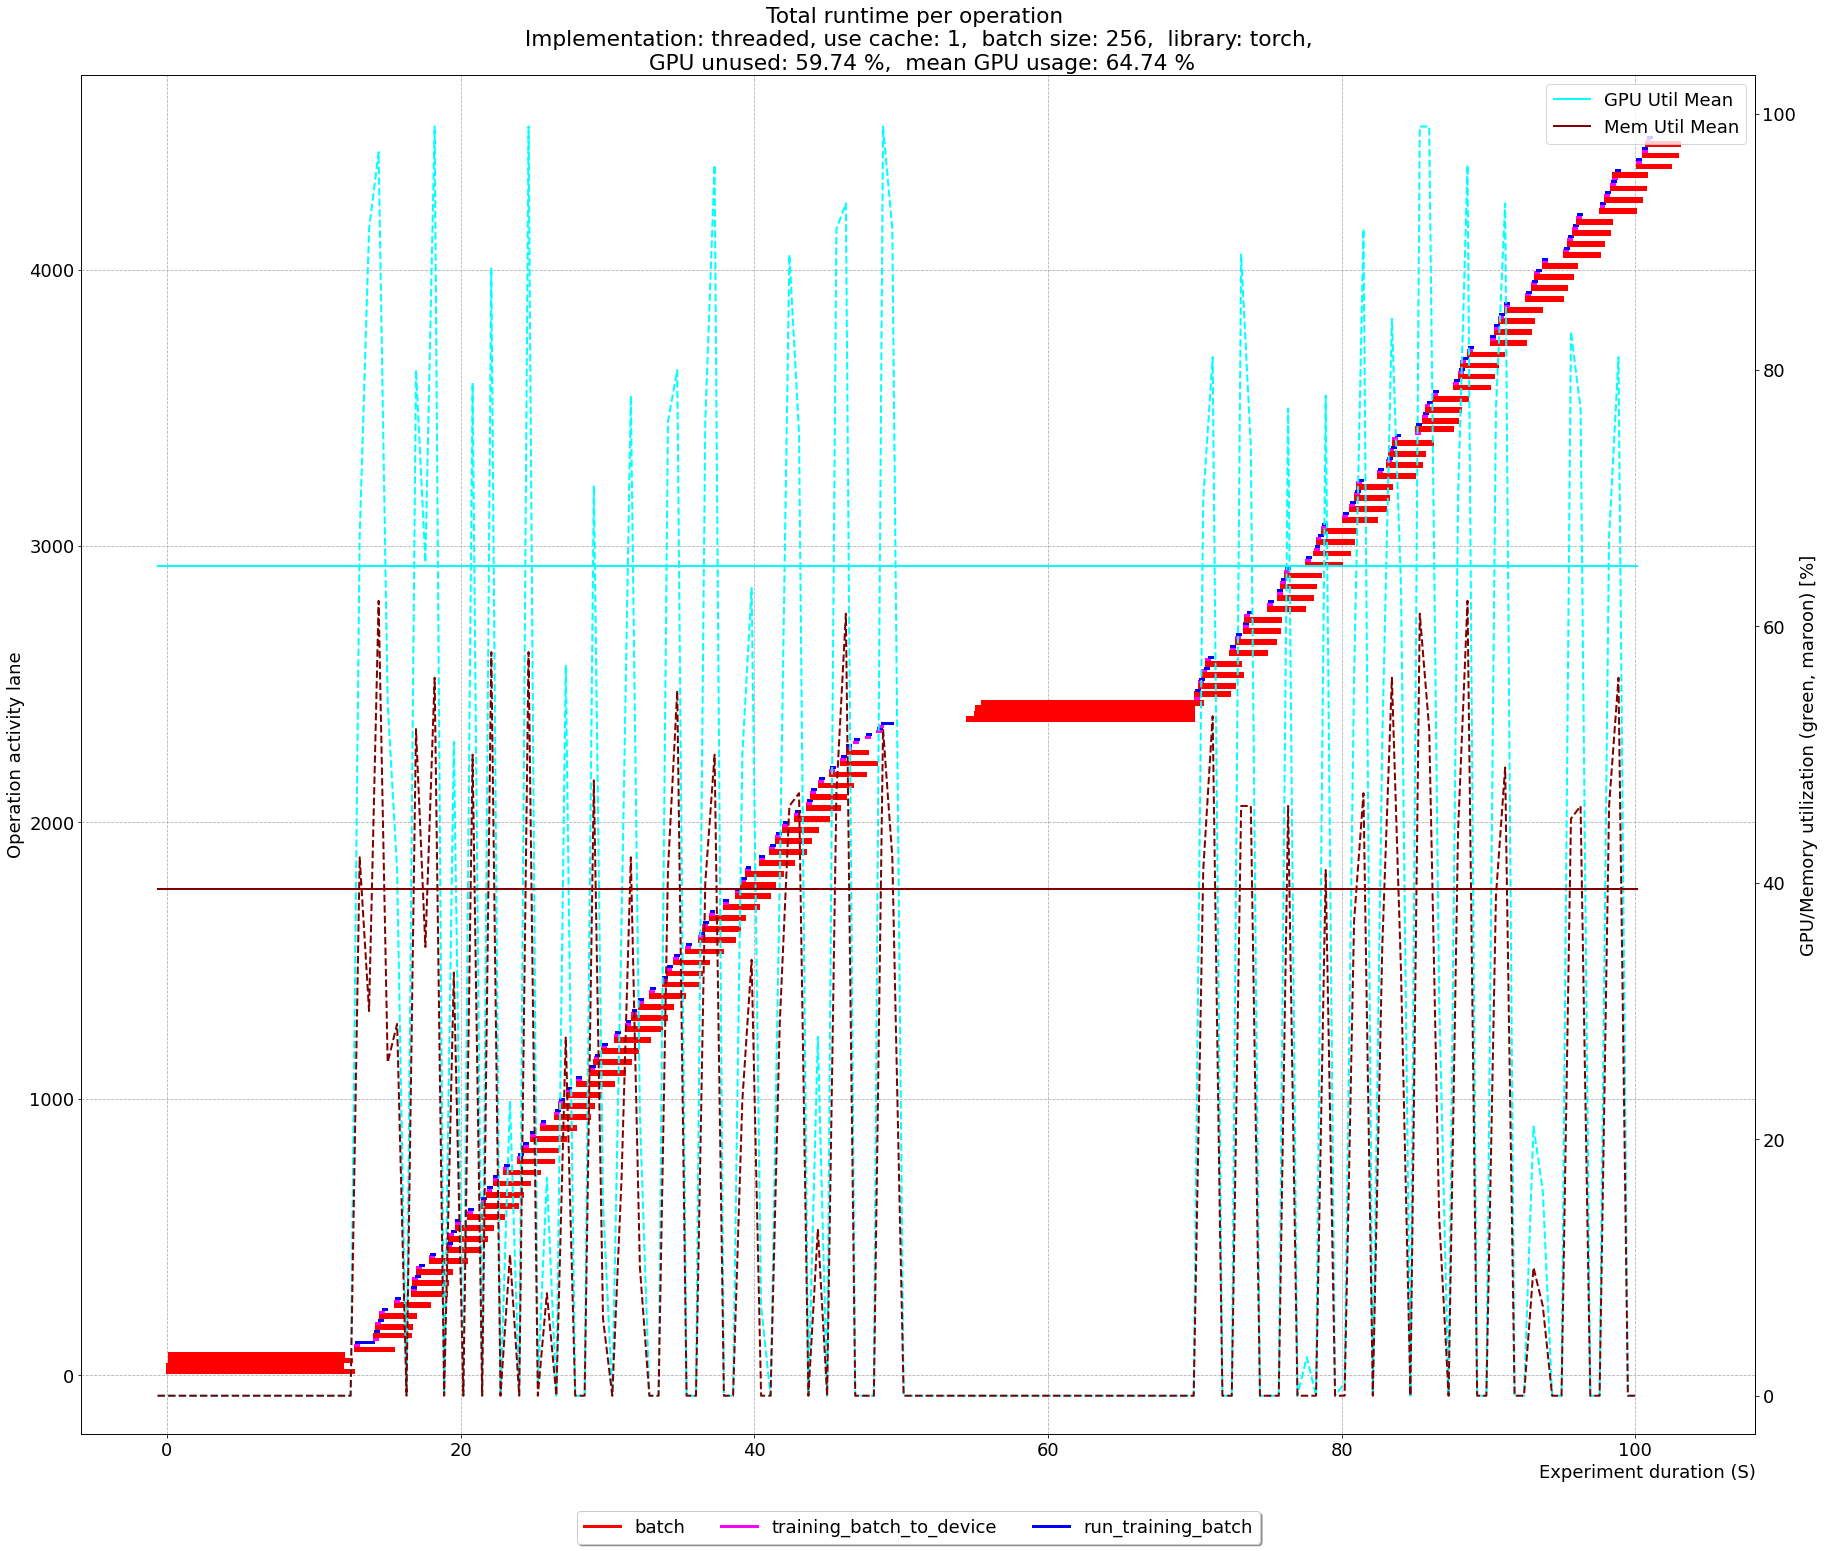

57.883495145631066 23.06896551724138


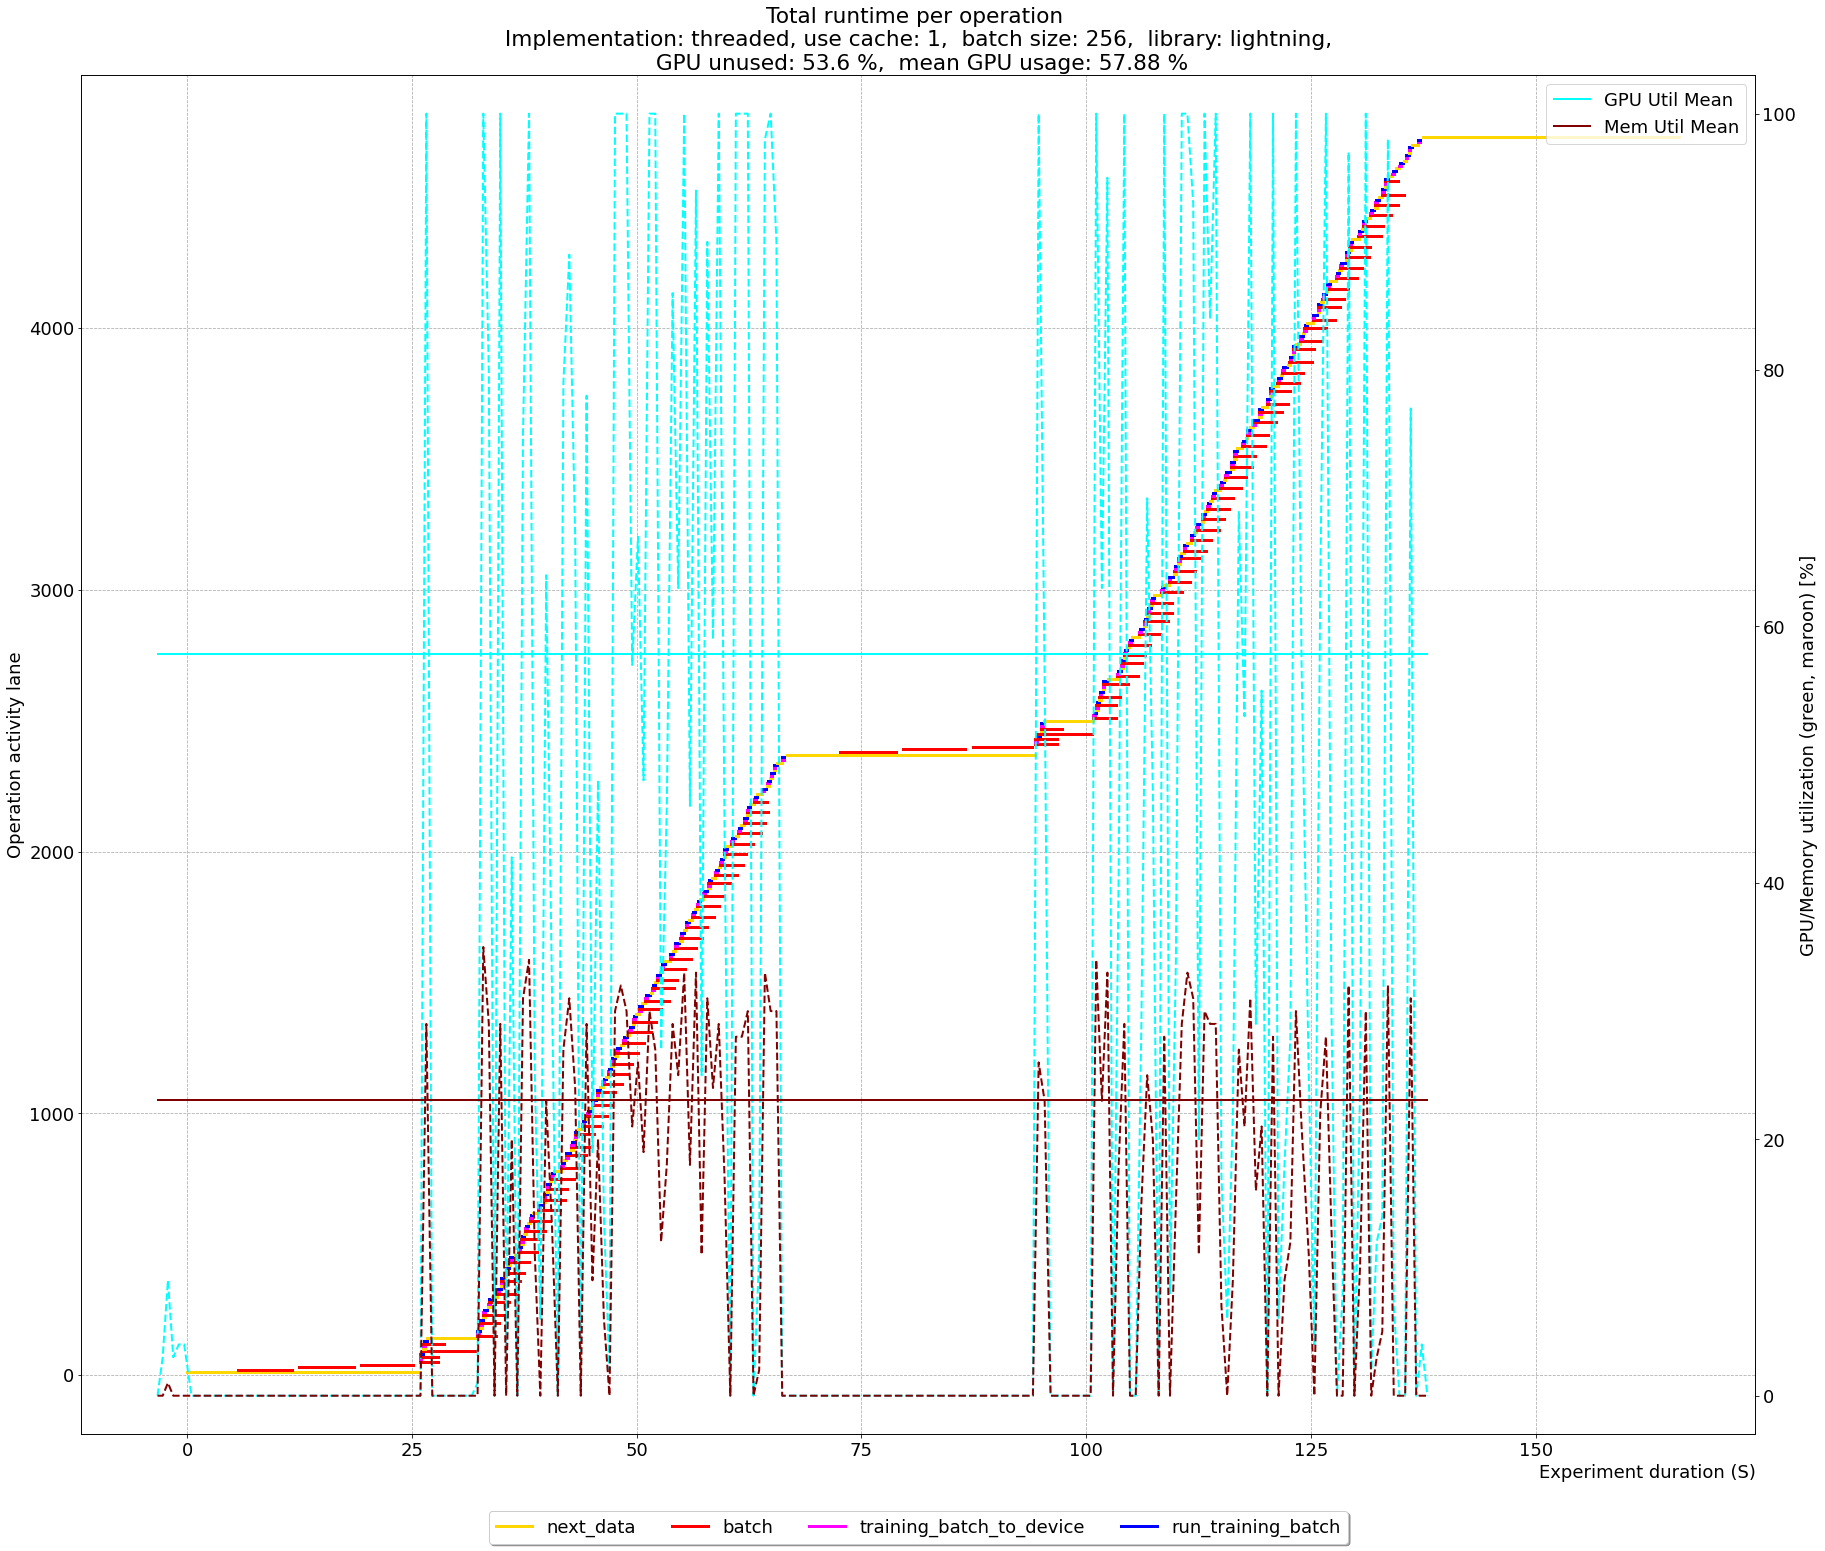

57.885245901639344 35.45283018867924


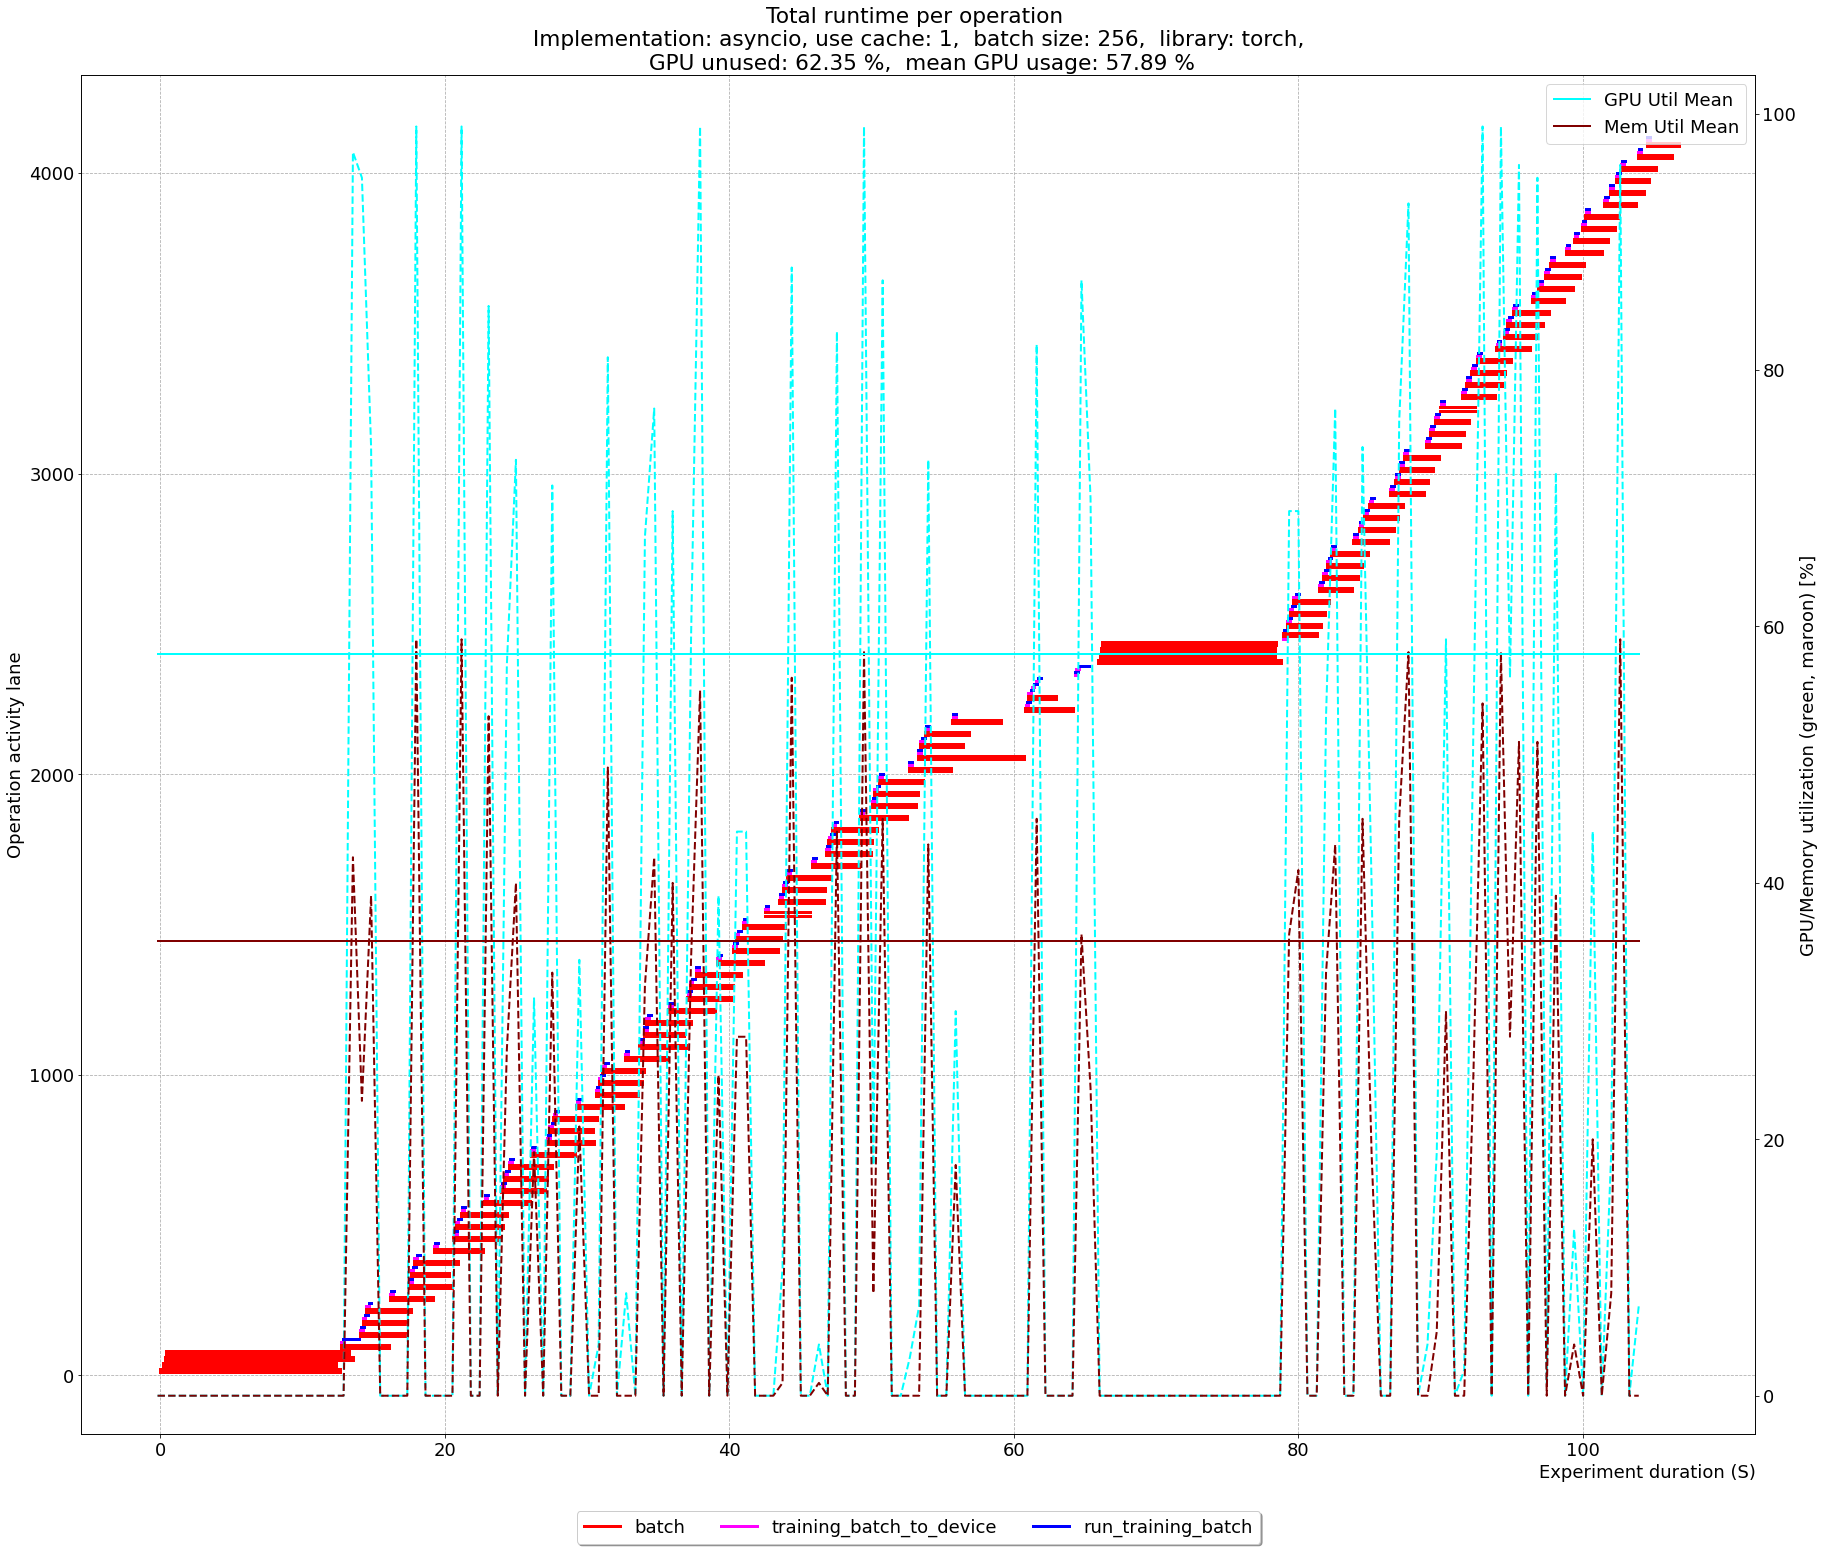

60.8125 23.794117647058822


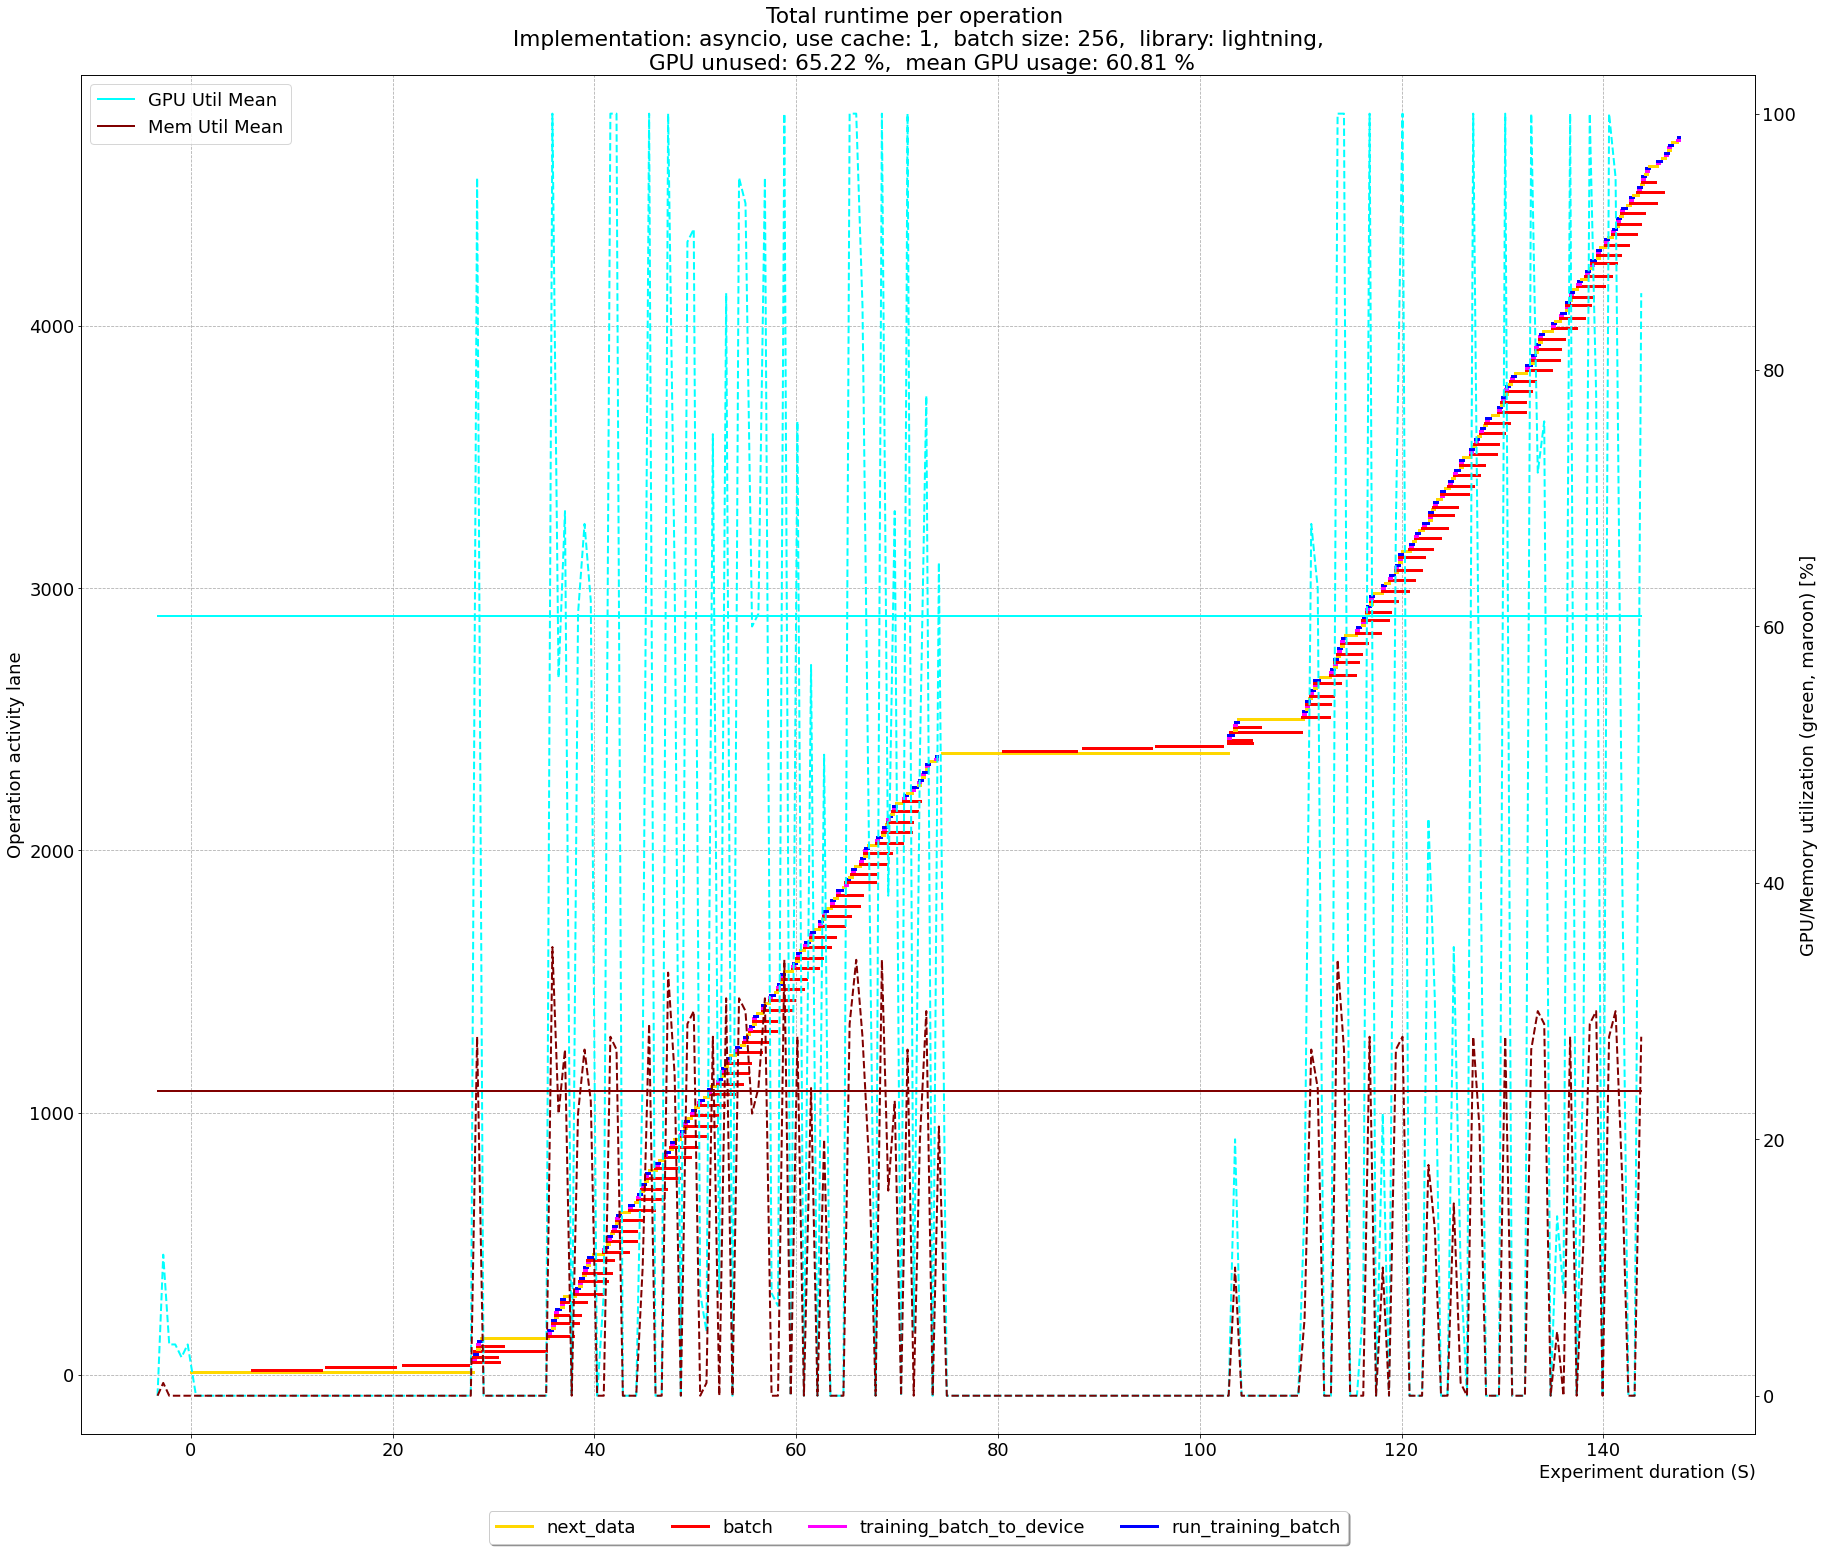

59.9873417721519 35.178082191780824


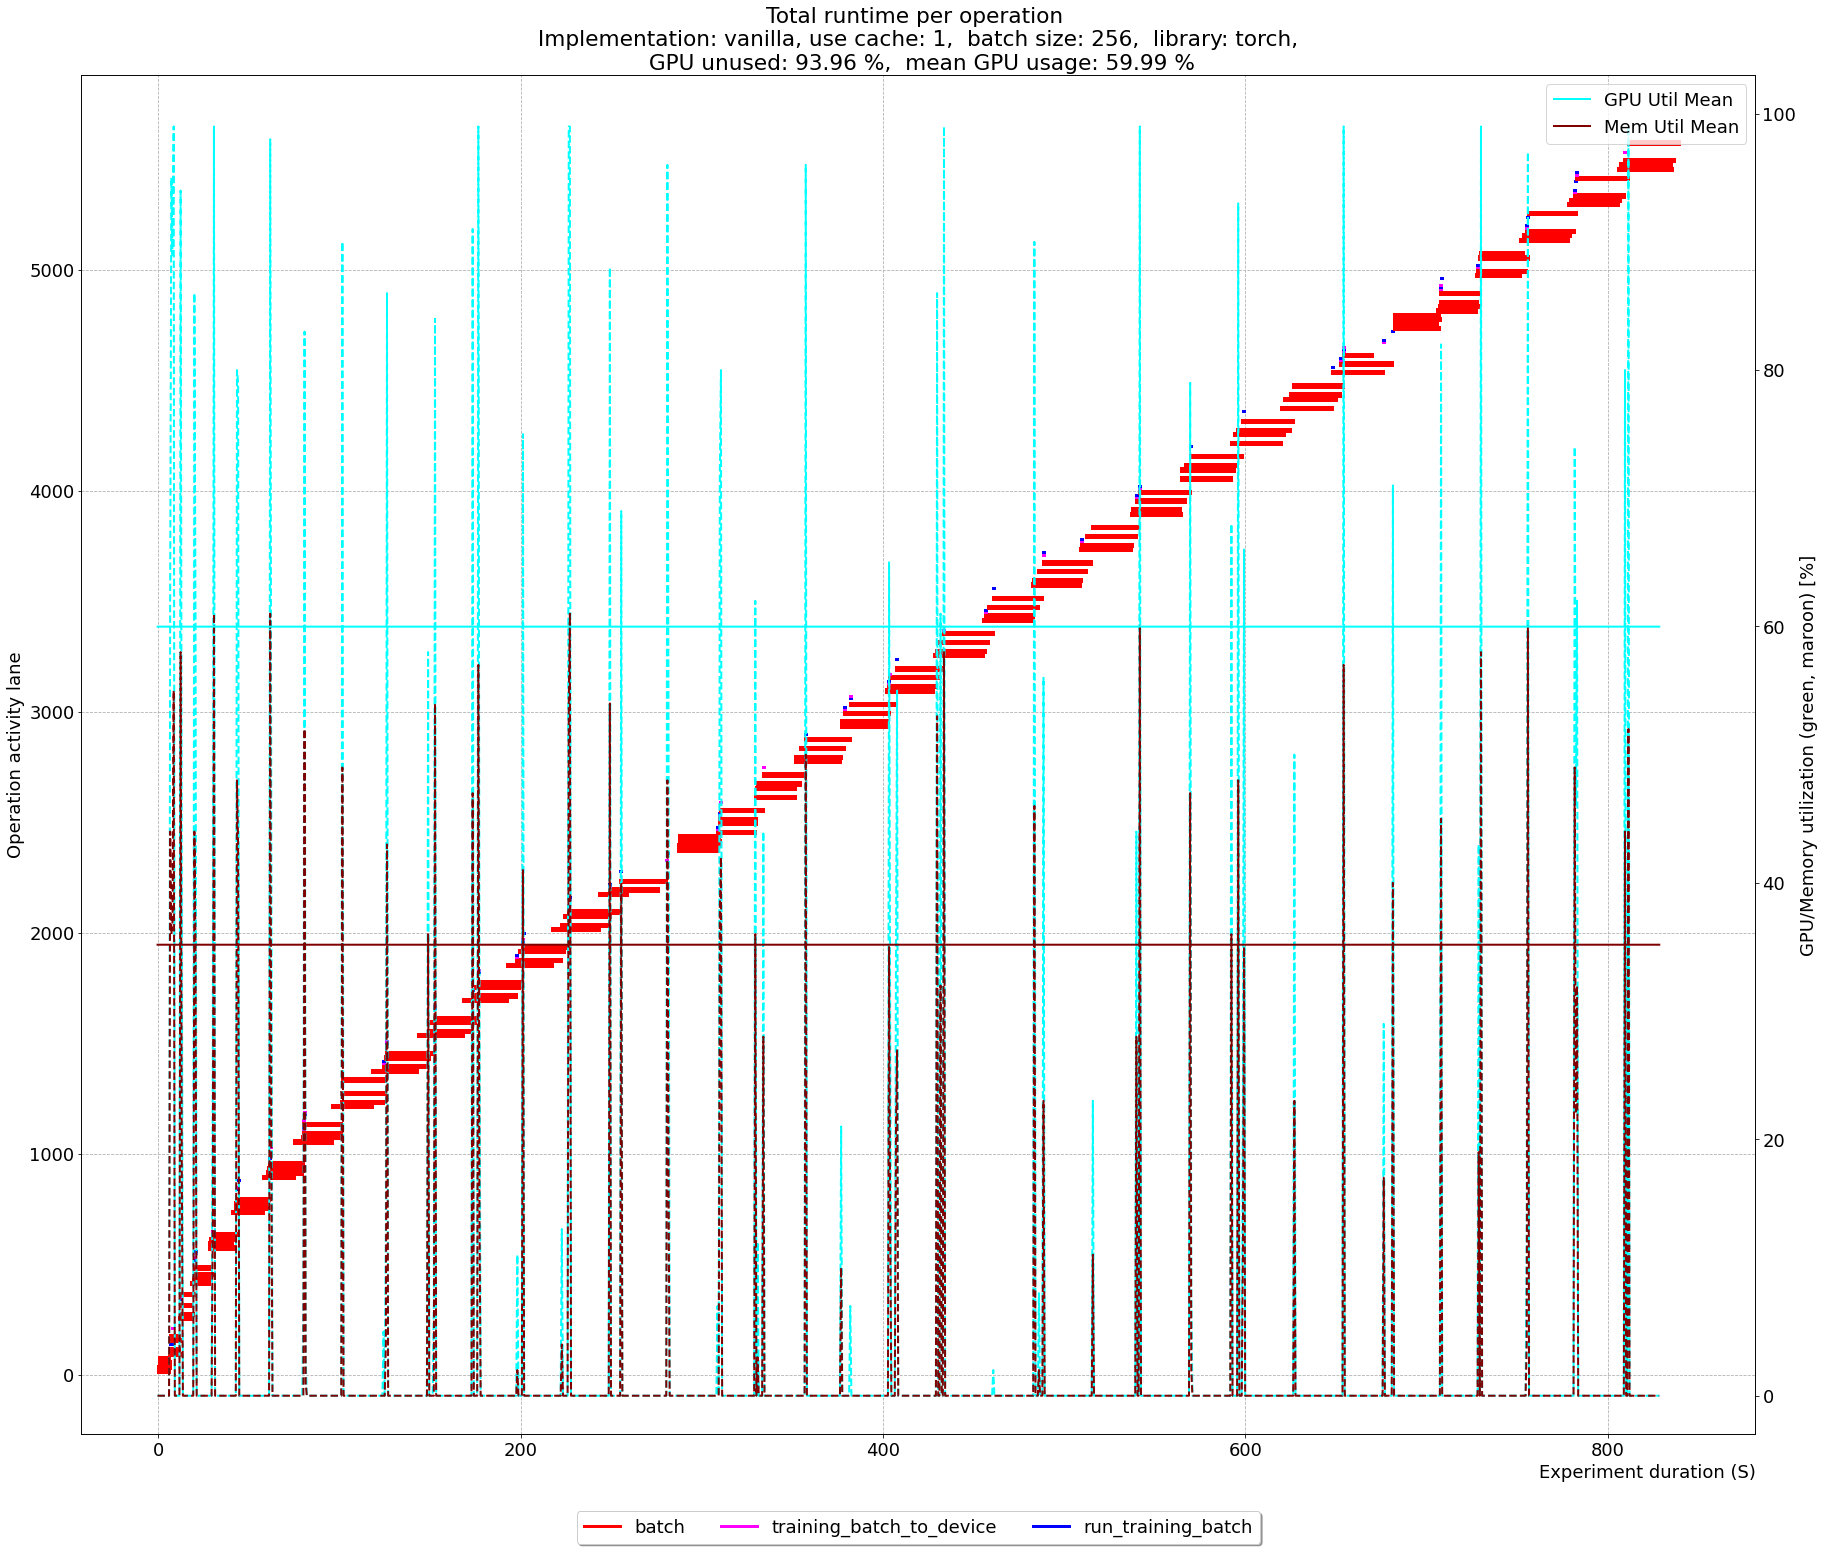

64.05714285714286 23.45263157894737


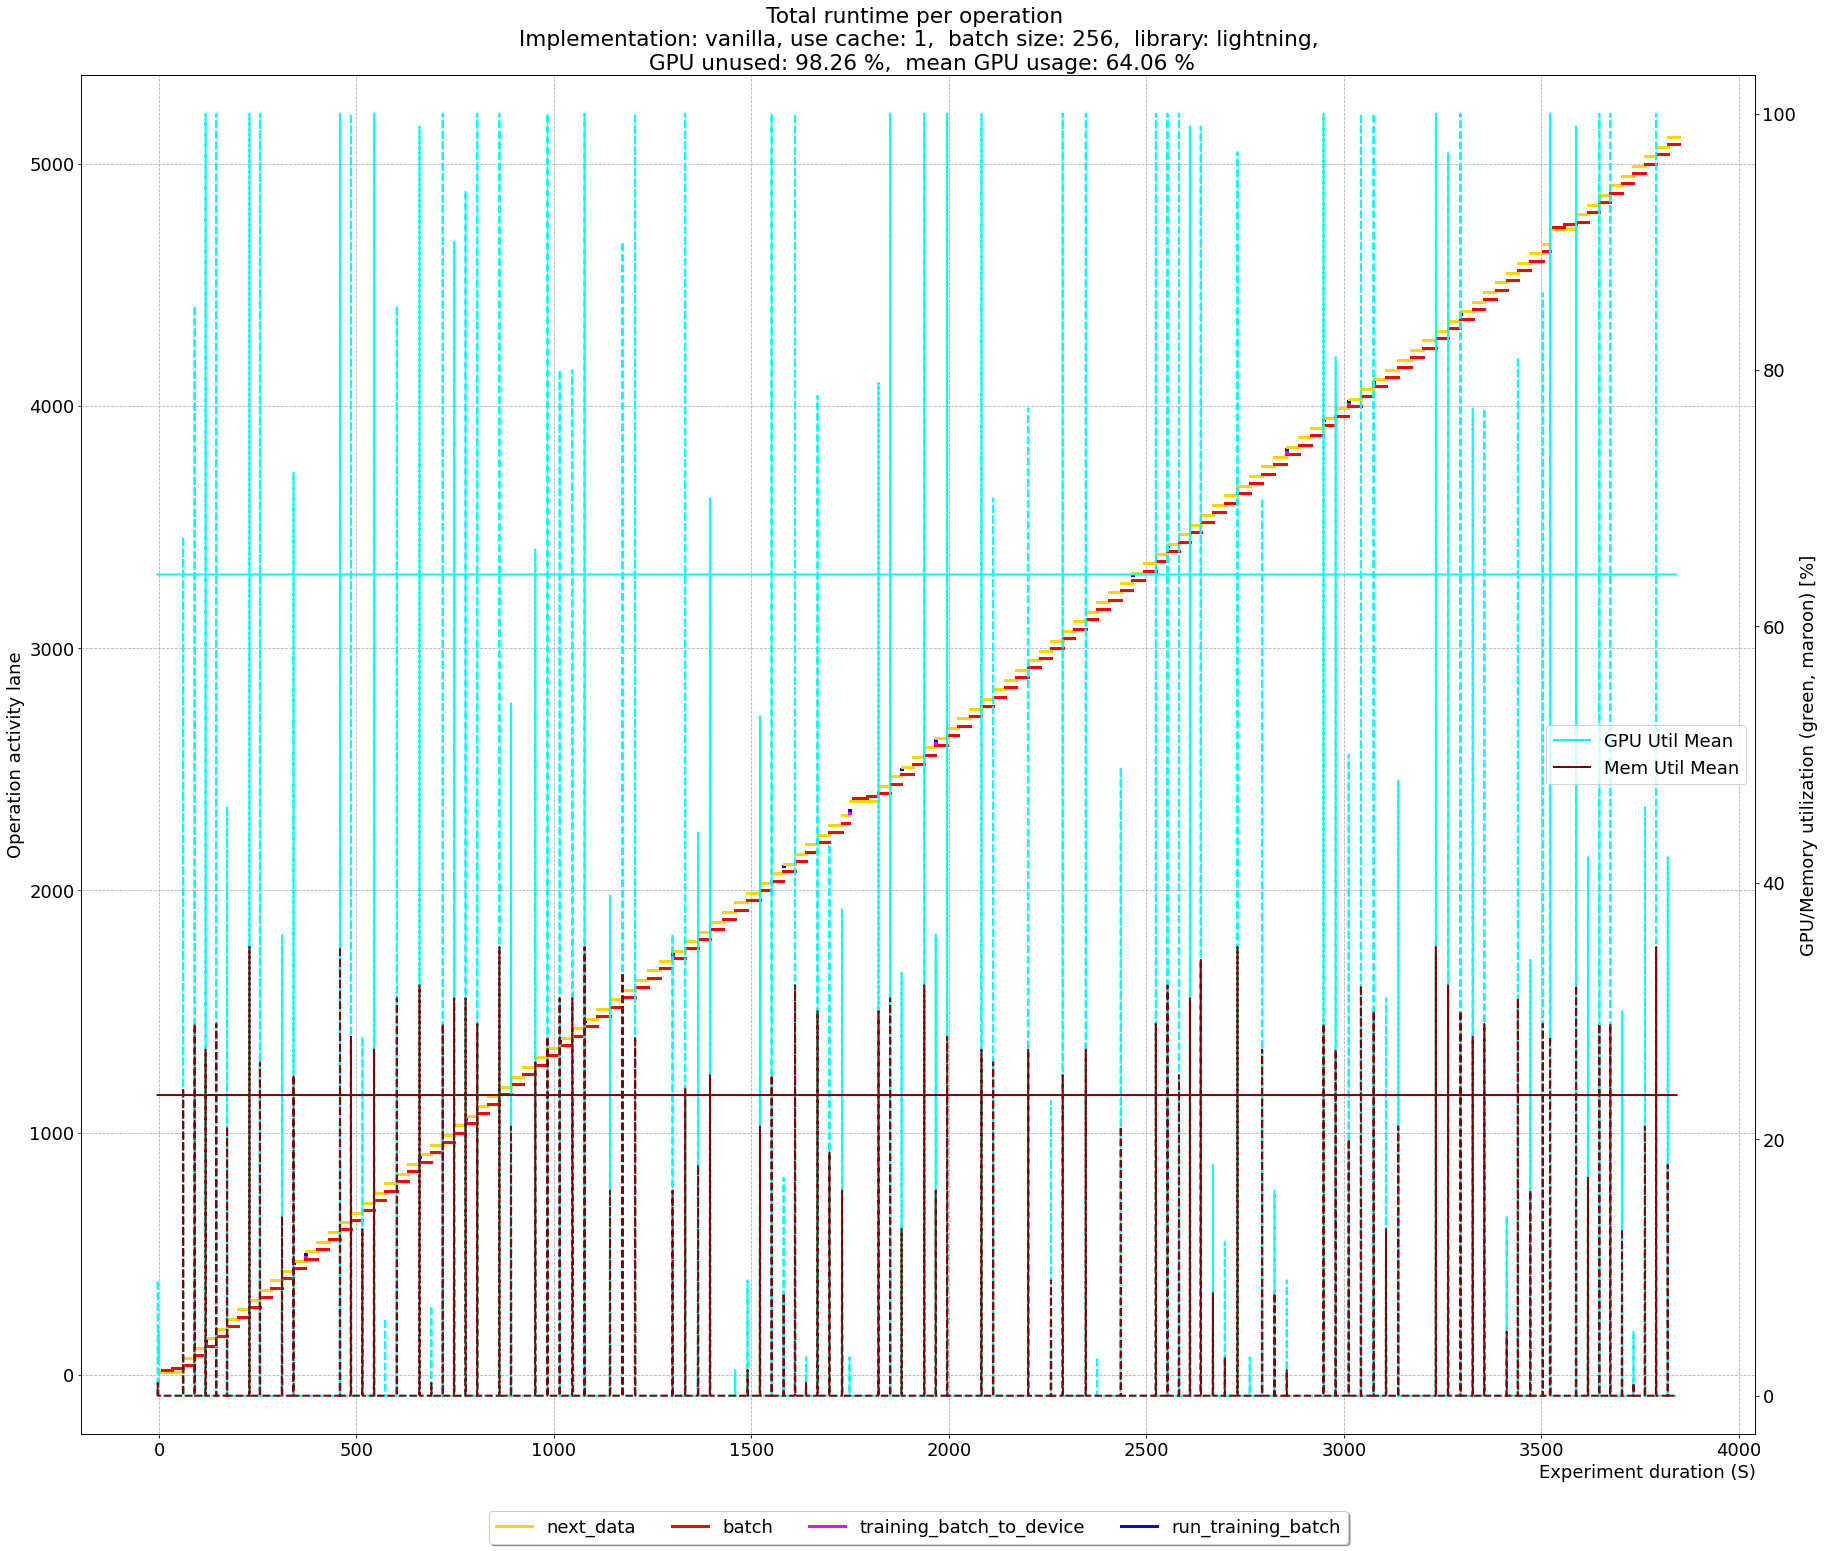

In [15]:
returns_s3 = []
for run in sorted(unique_runs_s3):
    df = df_dataloader_s3[df_dataloader_s3["run"]==run]
    dfgpu = df_gpuutil_s3[df_gpuutil_s3["run"]==run]
    returns_s3.append(show_timelines_with_gpu(df, dfgpu, lanes, colors, run, False, True, True, 2))


### Plot function timelines for local storage

78.12 46.270833333333336


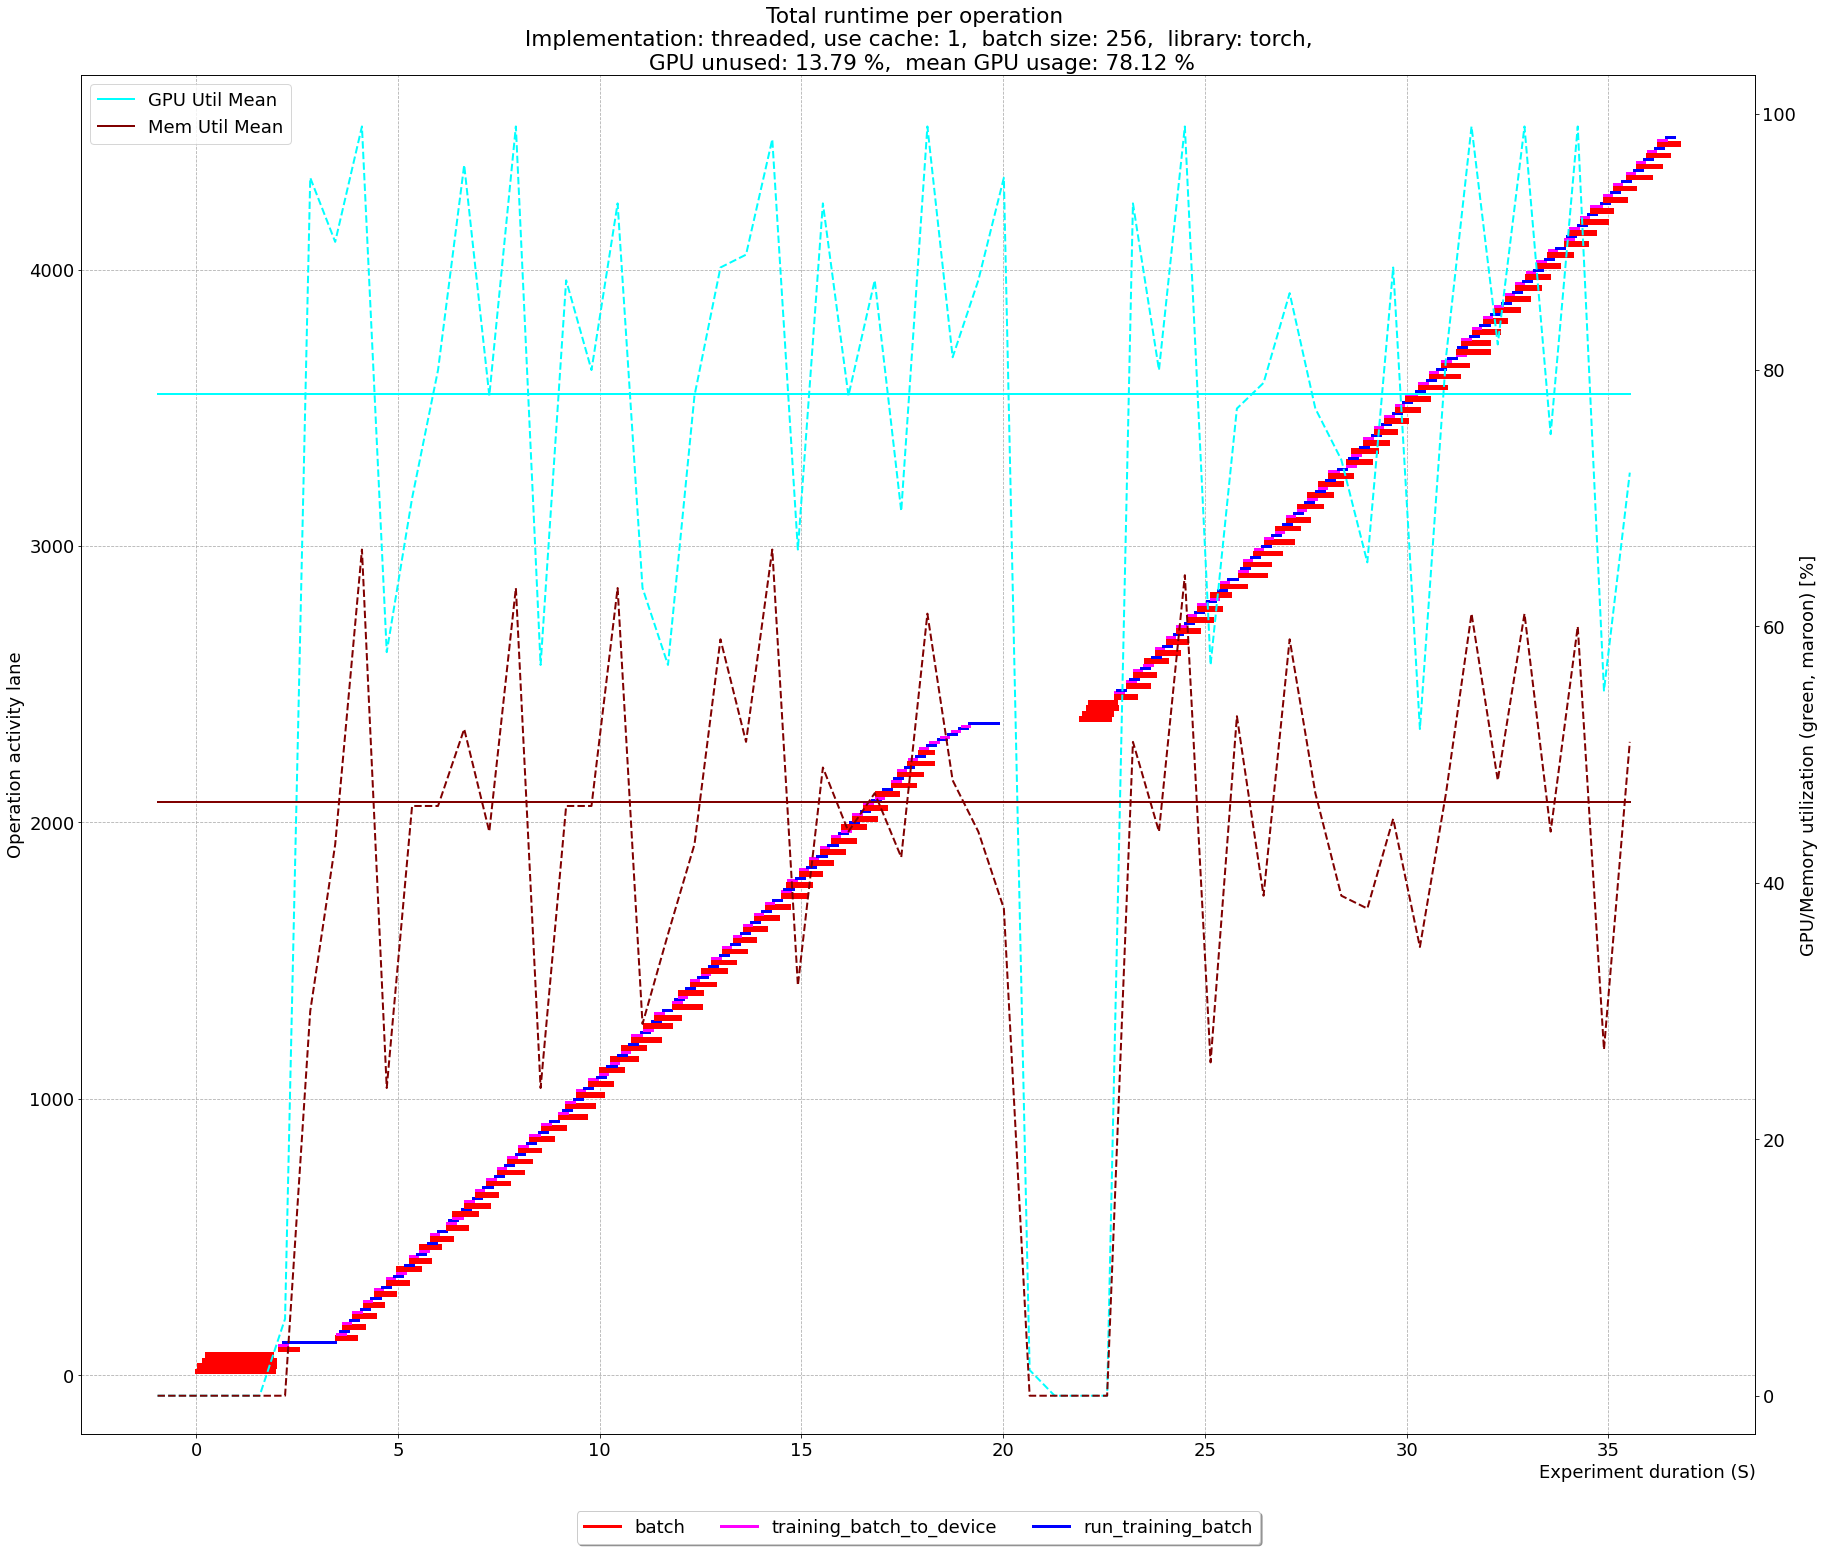

67.59740259740259 25.58823529411765


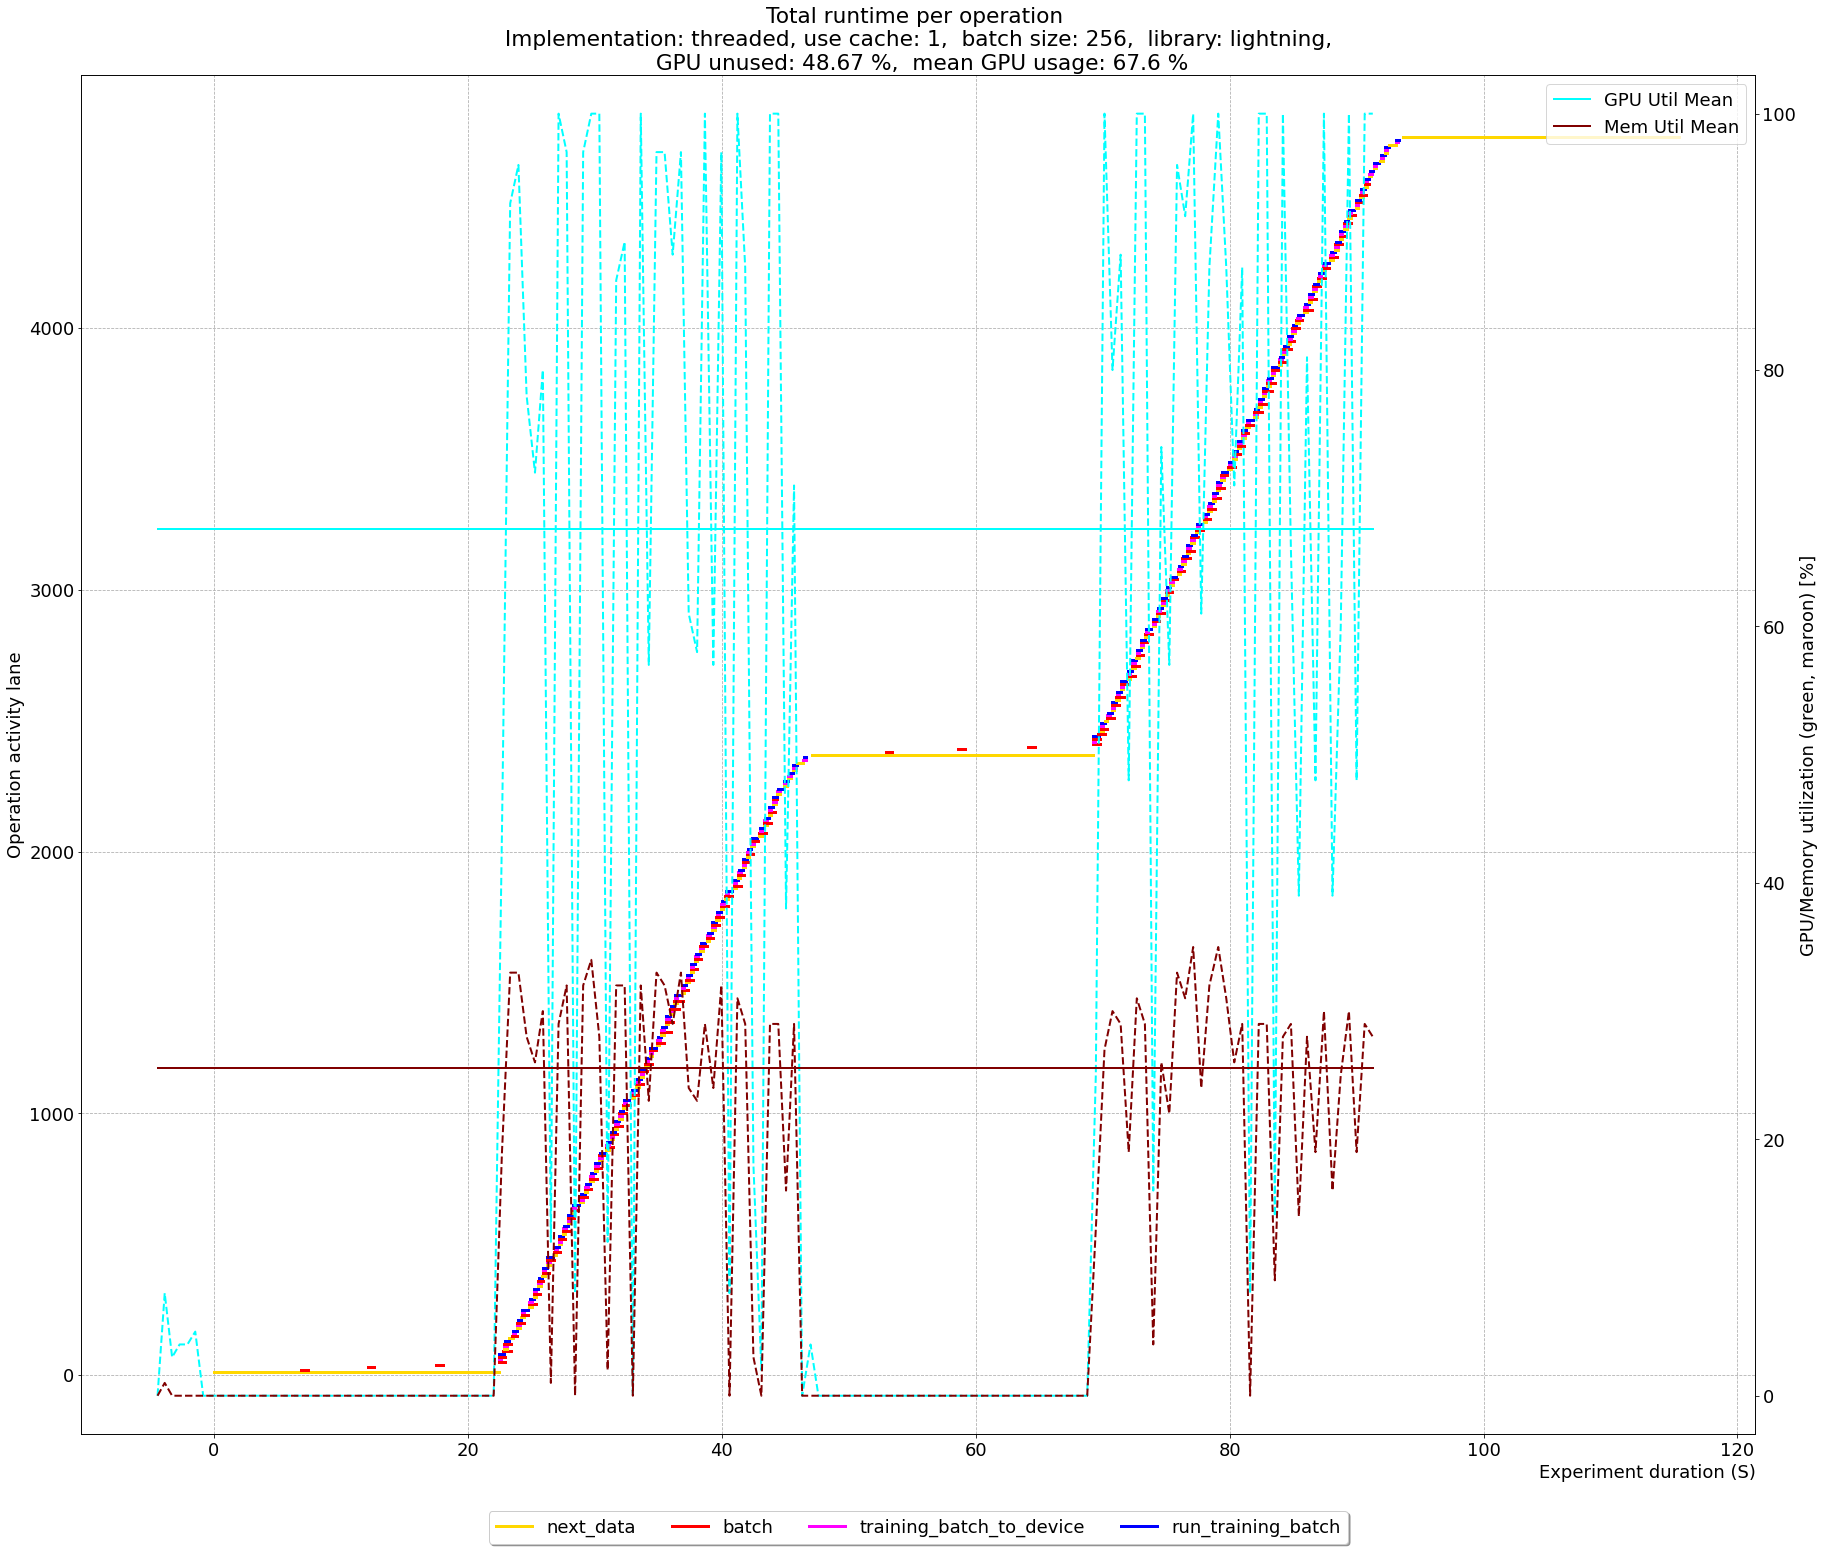

76.5 42.68


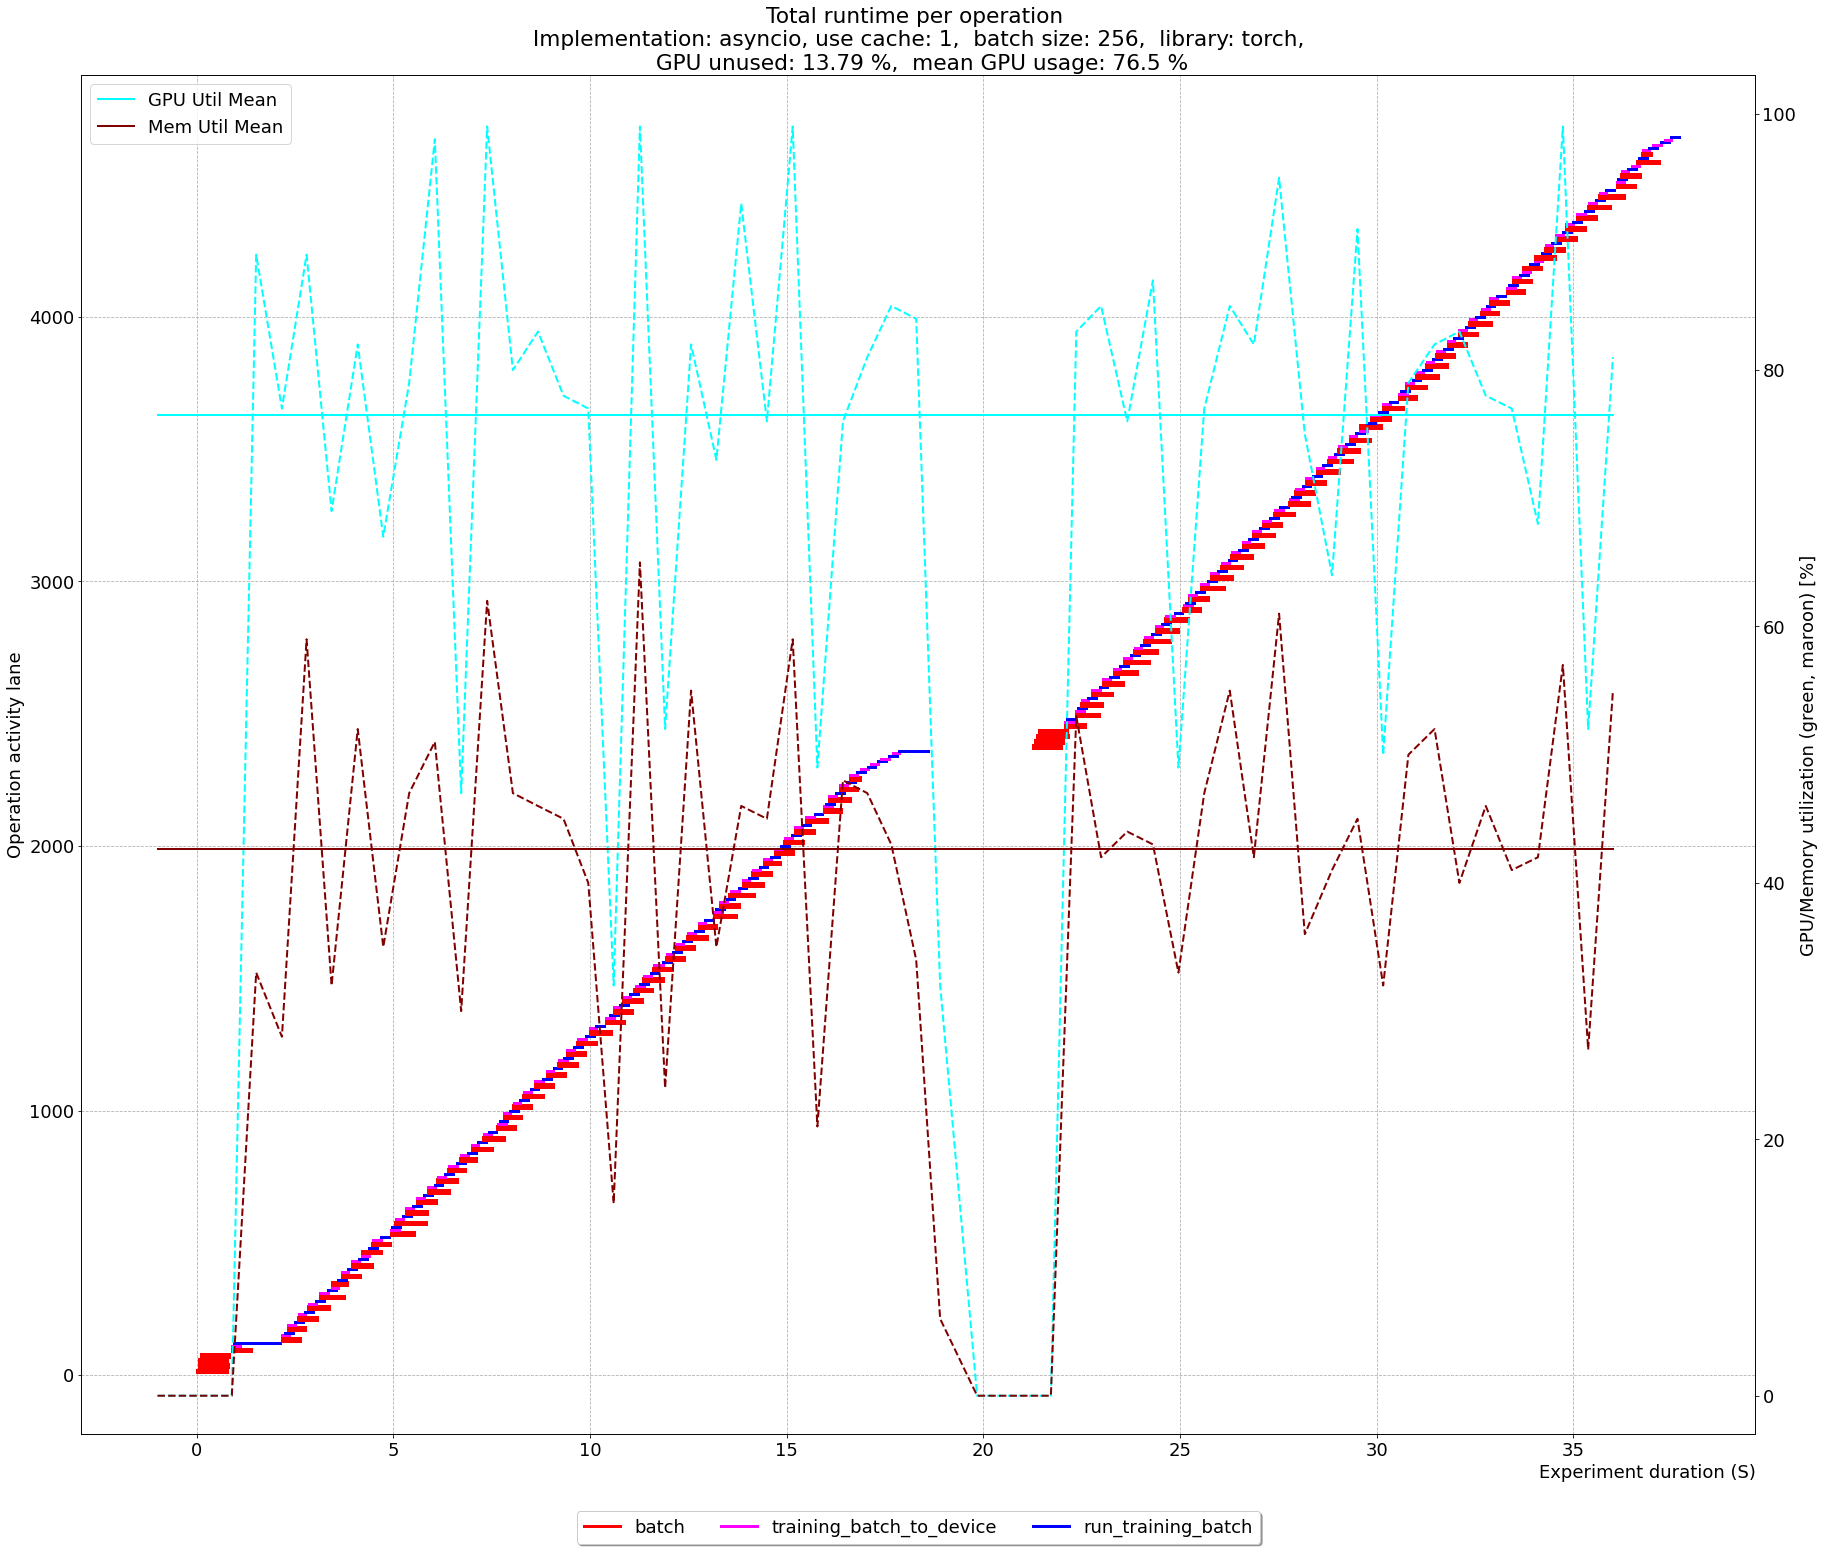

65.1038961038961 24.405797101449274


In [ ]:
returns_scratch = []
for run in sorted(unique_runs_scratch):
    df = df_dataloader_scratch[df_dataloader_scratch["run"]==run]
    dfgpu = df_gpuutil_scratch[df_gpuutil_scratch["run"]==run]
    returns_scratch.append(show_timelines_with_gpu(df, dfgpu, lanes, colors, run, False, True, True, 2))

### Result tables
Print throughput in loaded images per second, and function duration in seconds, for S3 and Scratch

In [ ]:
results = pd.DataFrame.from_records(data=returns_s3)
samples = 15000
results["throughput"] = 15000 / results["runtime"]
results.sort_values(["runtime", "library"], ascending=True)

In [ ]:
results = pd.DataFrame.from_records(data=returns_scratch)
results["throughput"] = 15000 / results["runtime"]
results.sort_values(["runtime", "library"], ascending=True)